# **Air Quality Dataset:**

https://catalog.data.gov/dataset/air-quality

## General Preprocessing

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt #visualization
import pandas as pd
import scipy.stats as stats #statistical analysis
import seaborn as sns #visualization

In [2]:
#creating dataframe from csv file
org_df=pd.read_csv('Air_Quality.csv')
org_df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


In [3]:
#checking for null values
print(org_df.isnull().sum())
#original sample size
print() #for visual space
print() #for visual space
print(f'Original Sample size: {len(org_df)}')

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16122
dtype: int64


Original Sample size: 16122


In [4]:
#delete column with 'NULL' values
df=org_df.dropna(axis=1)
df.isnull().sum() #checking that 'NULL' values are deleted

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [5]:
#deleting duplicates
df=df.drop_duplicates()
len(df) #output matches original sample size, no duplicates were found

16122

In [6]:
#checking that there are no 'unique id' duplicates
unique_ids=df['Unique ID'].drop_duplicates()
len(unique_ids) #output matches original sample size, no duplicate 'unique id' values were found

16122

In [7]:
#finding all the unique 'indicator id'
id_ind=df['Indicator ID'].unique()
print(f'Unique "Indicator ID": \n{id_ind}')
print(f'Number of unique "Indicator ID": {len(id_ind)}') #number of unique 'indicator id'
print() #for visual space

#finding all the unique 'name'
contam_name=df['Name'].unique()
print(f'Unique contaminant names: \n{contam_name}')
print(f'Number of unique contaminant names: {len(contam_name)}') #number of unique 'name'

#note: number of 'indicator id' and 'name' do not match; 3 more 'indicator id' than 'name'
print() #for visual space

#finding all unique 'measure'
measure_types=df['Measure'].unique()
print(f'Unique measurement types: \n{measure_types}')
print(f'Number of unique measurement types: {len(measure_types)}')

Unique "Indicator ID": 
[386 383 639 640 641 642 646 647 648 650 651 643 652 653 655 657 659 661
 644 645 375 365]
Number of unique "Indicator ID": 22

Unique contaminant names: 
['Ozone (O3)' 'Sulfur Dioxide (SO2)' 'PM2.5-Attributable Deaths'
 'Boiler Emissions- Total SO2 Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Boiler Emissions- Total NOx Emissions'
 'Air Toxics Concentrations- Average Benzene Concentrations'
 'Air Toxics Concentrations- Average Formaldehyde Concentrations'
 'PM2.5-Attributable Asthma Emergency Department Visits'
 'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)'
 'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)'
 'Traffic Density- Annual Vehicle Miles Traveled'
 'O3-Attributable Cardiac and Respiratory Deaths'
 'O3-Attributable Asthma Emergency Department Visits'
 'O3-Attributable Asthma Hospitalizations'
 'Traffic Density- Annual Vehicle Miles Traveled for Cars'
 'Traffic Density- Annual Vehicle 

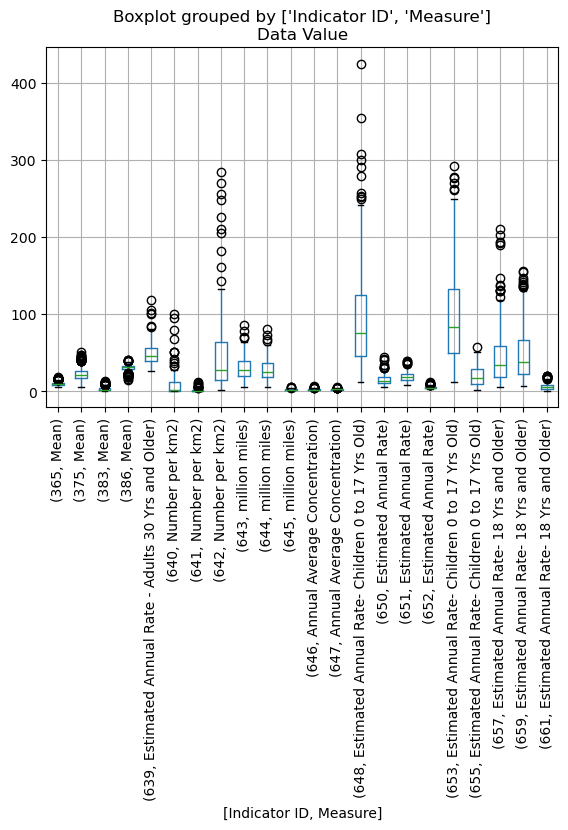

In [8]:
#Useless ugly graph, merely testing grouping option within .boxplot()
df.boxplot(column=['Data Value'], by=['Indicator ID','Measure'])
plt.xticks(rotation=90)
plt.show()

In [9]:
#manual grouping by 'Name' (contaminant name)
contam_grouping=df.groupby(['Name','Measure'])
contam_grouping.groups

print(f'Number of Contaminants by measurement type: {len(contam_grouping)}')

Number of Contaminants by measurement type: 22


In [10]:
contam_grouping['Data Value'].describe()

count  \
Name                                               Measure                                                   
Air Toxics Concentrations- Average Benzene Conc... Annual Average Concentration                      155.0   
Air Toxics Concentrations- Average Formaldehyde... Annual Average Concentration                      155.0   
Boiler Emissions- Total NOx Emissions              Number per km2                                     96.0   
Boiler Emissions- Total PM2.5 Emissions            Number per km2                                     96.0   
Boiler Emissions- Total SO2 Emissions              Number per km2                                     96.0   
Fine Particulate Matter (PM2.5)                    Mean                                             5076.0   
Nitrogen Dioxide (NO2)                             Mean                                             5076.0   
O3-Attributable Asthma Emergency Department Visits Estimated Annual Rate- 18 Yrs and Older           192.0   
                                                   Estimated Annual Rate- Children 0 to 17 Yrs Old   192.0   
O3-Attributable Asthma Hospitalizations            Estimated Annual Rate- 18 Yrs and Older           192.0   
                                                   Estimated Annual Rate- Children 0 to 17 Yrs Old   192.0   
O3-Attributable Cardiac and Respiratory Deaths     Estimated Annual Rate                             192.0   
Ozone (O3)                                         Mean                                             1692.0   
PM2.5-Attributable Asthma Emergency Department ... Estimated Annual Rate- 18 Yrs and Older           192.0   
                                                   Estimated Annual Rate- Children 0 to 17 Yrs Old   192.0   
PM2.5-Attributable Cardiovascular Hospitalizati... Estimated Annual Rate                             192.0   
PM2.5-Attributable Deaths                          Estimated Annual Rate - Adults 30 Yrs and Older   192.0   
PM2.5-Attributable Respiratory Hospitalizations... Estimated Annual Rate                             192.0   
Sulfur Dioxide (SO2)                               Mean                                             1128.0   
Traffic Density- Annual Vehicle Miles Traveled     million miles                                     209.0   
Traffic Density- Annual Vehicle Miles Traveled ... million miles                                     214.0   
Traffic Density- Annual Vehicle Miles Traveled ... million miles                                     209.0   

                                                                                                         mean  \
Name                                               Measure                                                      
Air Toxics Concentrations- Average Benzene Conc... Annual Average Concentration                      2.030201   
Air Toxics Concentrations- Average Formaldehyde... Annual Average Concentration                      2.481290   
Boiler Emissions- Total NOx Emissions              Number per km2                                   53.791667   
Boiler Emissions- Total PM2.5 Emissions            Number per km2                                    1.373958   
Boiler Emissions- Total SO2 Emissions              Number per km2                                   10.991667   
Fine Particulate Matter (PM2.5)                    Mean                                              9.516063   
Nitrogen Dioxide (NO2)                             Mean                                             21.277147   
O3-Attributable Asthma Emergency Department Visits Estimated Annual Rate- 18 Yrs and Older          50.810938   
                                                   Estimated Annual Rate- Children 0 to 17 Yrs Old  98.625521   
O3-Attributable Asthma Hospitalizations            Estimated Annual Rate- 18 Yrs and Older           6.410938   
                                                   Estimated Annual Rate- Children 0 to 17 Yrs Old  19.8

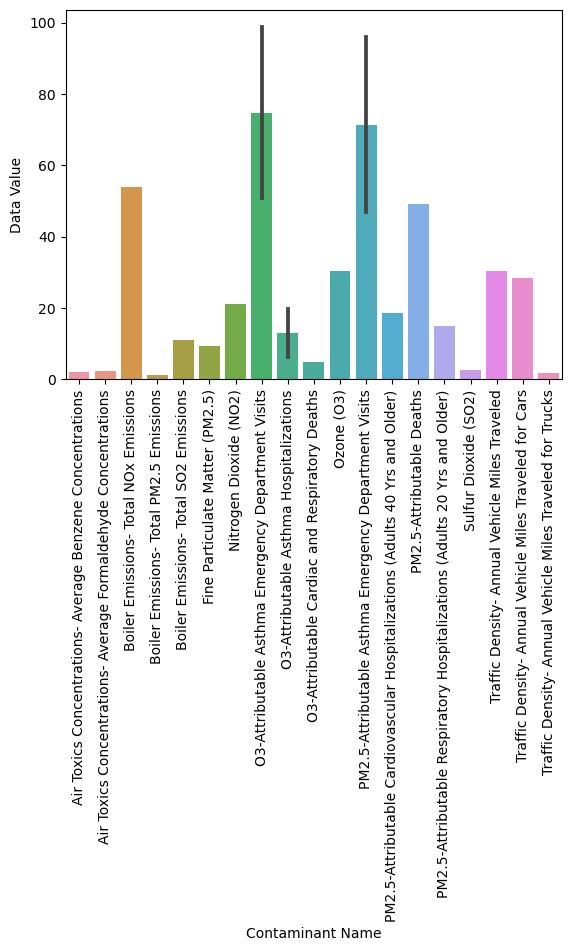

In [11]:
#Useless ugly graph, was just trying to see how well using .groupby and then graphing worked
agg_grouped=df.groupby(['Name','Measure']).agg({'Data Value':'mean'}).reset_index()
sns.barplot(data=agg_grouped, x='Name', y='Data Value')
plt.xticks(rotation=90)
plt.xlabel('Contaminant Name')
plt.show()

## Question: Does the season make a difference in the contaminant concentrations?

- O3 (Mean, ppb)
- PM2.5 (Mean, mcg per cubic meter)
- SO2 (Mean, ppb)

Note: Only where 'Measure'=='Mean' does there exist seasonal data. Additionally, 'Mean' measurements differ between the contaminants; however, that does not matter because comparisons are not between the different contaminants.

Note2: ppb = part per billion; PPB "is often used to describe concentrations of contaminants in air (as a volume fraction). In this case the conversion of ppb to µg/m^3 depends on the molecular weight of the contaminant."

Definition from: https://www.greenfacts.org/glossary/pqrs/parts-per-billion.htm

Note3: mcg per cubic meter = microgram per cubic meter (µg/m^3); mcg per cubic meter is "A measure of concentration in terms of mass per unit volume. A concentration of 1 µg/m^3 means that one cubic metre of air contains one microgram (10-6 grams) of pollutant."

Definition from: https://uk-air.defra.gov.uk/air-pollution/glossary.php?glossary_id=37#37

### Creating function for categorizing data by season

In [12]:
#checking what seasonal data is available from dataset
df['Time Period'].unique()

#Note: only available seasonal data relates to summer and winter

array(['Summer 2013', 'Summer 2014', 'Winter 2008-09', 'Summer 2009',
       'Summer 2010', 'Summer 2011', 'Summer 2012', 'Winter 2009-10',
       '2005-2007', '2013', '2005', '2009-2011', 'Winter 2010-11',
       'Winter 2011-12', 'Winter 2012-13', 'Annual Average 2009',
       'Annual Average 2010', 'Annual Average 2011',
       'Annual Average 2012', 'Annual Average 2013', '2015',
       'Winter 2013-14', 'Annual Average 2014', '2011', 'Winter 2014-15',
       '2016', 'Annual Average 2015', 'Summer 2015', 'Winter 2015-16',
       'Summer 2016', 'Annual Average 2016', 'Summer 2017', '2012-2014',
       'Summer 2018', 'Annual Average 2017', 'Summer 2019',
       'Winter 2016-17', 'Annual Average 2018', 'Winter 2017-18',
       '2015-2017', 'Summer 2020', 'Annual Average 2019',
       'Winter 2018-19', 'Annual Average 2020', 'Winter 2019-20'],
      dtype=object)

In [13]:
#Note: as stated above, only seasonal data available is 'Summer' and 'Winter'; no need to categorize for 'Fall'/'Spring' when no such data exists
def season_category(column):
  if 'Winter' in column:
    return 'Winter'
  elif 'Summer' in column: #else not used because 'Time Period' column includes more than just seasonal time periods
    return 'Summer'

#applying user defined function to dataset
df['Season']=df['Time Period'].apply(season_category)

#checking that column got added
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Season
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,Summer
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,Summer
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,Summer
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,Summer
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,Winter


In [14]:
#removing all data points unrelated to seasons
seasonal_data=df.dropna()

#seeing what data is left after removal
grouping=seasonal_data.groupby(['Name','Measure','Measure Info','Season']) #grouping dataset

grouping['Data Value'].describe()

count  \
Name                            Measure Measure Info        Season           
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer  1692.0   
                                                            Winter  1692.0   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer  1692.0   
                                                            Winter  1692.0   
Ozone (O3)                      Mean    ppb                 Summer  1692.0   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter  1128.0   

                                                                         mean  \
Name                            Measure Measure Info        Season              
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer   9.755732   
                                                            Winter  10.043425   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer  16.832768   
                                                            Winter  26.122027   
Ozone (O3)                      Mean    ppb                 Summer  30.367398   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter   2.615734   

                                                                         std  \
Name                            Measure Measure Info        Season             
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer  1.728959   
                                                            Winter  2.309408   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer  5.452644   
                                                            Winter  4.563128   
Ozone (O3)                      Mean    ppb                 Summer  3.287527   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter  2.339303   

                                                                      min  \
Name                            Measure Measure Info        Season          
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer   6.27   
                                                            Winter   5.92   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer   5.90   
                                                            Winter  13.88   
Ozone (O3)                      Mean    ppb                 Summer  14.38   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter   0.11   

                                                                        25%  \
Name                            Measure Measure Info        Season            
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer   8.3200   
                                                            Winter   8.1500   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer  13.3225   
                                                            Winter  23.1600   
Ozone (O3)                      Mean    ppb                 Summer  28.7900   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter   0.8400   

                                                                       50%  \
Name                            Measure Measure Info        Season           
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer   9.790   
                                                            Winter   9.710   
Nitrogen Dioxide (NO2)          Mean    ppb                 Summer  16.190   
                                                            Winter  25.865   
Ozone (O3)                      Mean    ppb                 Summer  30.655   
Sulfur Dioxide (SO2)            Mean    ppb                 Winter   1.920   

                                                                        75%  \
Name                            Measure Measure Info        Season            
Fine Particulate Matter (PM2.5) Mean    mcg per cubic meter Summer  11.0000   
                                          